Presentado por: Diego Quisi

# Entornos de soporte al desarrollo de simulaciones: Simpy - Parte 2


## Generacion de graficar de atencion. 

En base a la simulacion anterior generar una grafica de los autos atendidos.

In [54]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 7 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 9
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(TIEMPO_LAVADO)
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))

        k=env.now
    if k in tiempo:
        tiempo[k]=tiempo[k]+1
    else:
        tiempo[k]=1
    
    
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


Lavanderia UPS
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Removido  {46%} suciedad vehiculo => Vehiculo-1 
Removido  {50%} suciedad vehiculo => Vehiculo-2 
Removido  {42%} suciedad vehiculo => Vehiculo-3 
Vehiculo [Vehiculo-1] lavado a las 7.00.
Vehiculo [Vehiculo-2] lavado a las 7.00.
Vehiculo [Vehiculo-3] lavado a las 7.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 7.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 7.00.
Llega vehiculo: Vehiculo-6 a la hora 12.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 12.00.
Removido  {42%} suciedad vehiculo => Vehiculo-4 
Removido  {82%} suciedad vehiculo => Vehiculo-5 
Vehiculo [Vehiculo-4] lavado a las 14.0

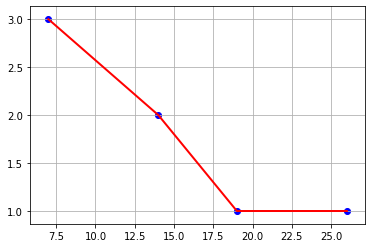

In [3]:
# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Paremetrizando la simulacion

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 20 minutos
    * Automóvil: 7 minutos
    * Furgoneta: 12 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Realice una gráfica de la simulación con 3 máquinas de lavado

In [34]:
import simpy
import random
import matplotlib.pyplot as pp

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 9
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

# class Lavanderia(object):
    
#     def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
#                  tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
#         # Guardamos como variable el entorno de ejecucion
#         self.env=environment
#         # Creamos el recurso que representa las maquinas
#         self.maquinas = simpy.Resource(environment, num_maquinas)
#         # Variable para el tiempo de lavado
#         self.tiempo_bus = tiempo_bus
#         self.tiempo_automovil = tiempo_automovil
#         self.tiempo_furgoneta = tiempo_furgoneta
#         self.traslado_bus = traslado_bus
#         self.traslado_automovil = traslado_automovil
#         self.traslado_furgoneta = traslado_furgoneta
        
#     def lavar_vehiculo(self, vehiculo):
        
#         automotor=vehiculo.split('-')
        
#         if(automotor[0] == 'Bus'):
#             yield self.env.timeout(TIEMPO_BUS)
            
#         if(automotor[0] == 'Automovil'):
#             yield self.env.timeout(TIEMPO_AUTOMOVIL)
        
#         if(automotor[0] == 'Furgoneta'):
#             yield self.env.timeout(TIEMPO_FURGONETA)
            
#         k=env.now
#         if k in tiempo:
#             tiempo[k]=tiempo[k]+1
#         else:
#             tiempo[k]=1
            
#         # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
#         # Para el % generamos un entero entre 30 y 90
#         print('Removido  {%d%%} suciedad vehiculo => %s ' \
#               % (random.randint(30,90), vehiculo))
        
#     def trasladar_vehiculo(self, vehiculo):
        
#         automotor=vehiculo.split('-')
        
#         if(automotor[0] == 'Bus'):
#             yield self.env.timeout(TRASLADO_BUS)
            
#         if(automotor[0] == 'Automovil'):
#             yield self.env.timeout(TRASLADO_AUTOMOVIL)
        
#         if(automotor[0] == 'Furgoneta'):
#             yield self.env.timeout(TRASLADO_FURGONETA)
        
#         k=env.now
#         if k in tiempo:
#              tiempo[k]=tiempo[k]+1
#         else:
#              tiempo[k]=1
    
# def llegada_vehiculo(env, nombre, lavanderia):
#     # Usamos el reloj de la simulacion (env.now()) para indicar a la
#     # hora que llega el vehiculo con el nombre pasado como parametro
#     print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
#     # Especificamos que vamos a usar un recurso (Resource) que representa
#     # la maquina de lavado
#     with lavanderia.maquinas.request() as maquina:
#         # Ocupamos la maquina de lavado
#         yield maquina
#         #Indicamos que el vehiculo se esta trasladando para ser lavado
#         print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
#         #Procesamos el traslado del vehiculo
#         yield env.process(lavanderia.trasladar_vehiculo(nombre))
#         # Indicamos que vehiculo entra a la lavanderia
#         print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
#         # Procesamos la operacion de lavado
#         yield env.process(lavanderia.lavar_vehiculo(nombre))
#         # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
#         print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
# def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
#                         tiempo_furgoneta,traslado_bus,traslado_automovil,
#                         traslado_furgoneta, intervalo):
#     lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
#                           tiempo_furgoneta,traslado_bus,traslado_automovil,
#                           traslado_furgoneta)
#     # Creamos 5 llegadas de vehiculos iniciales
#     for i in range(5):
#         env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
#         env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
#         env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
#     # Ejecutamos la simulacion
#     while True:
#         yield env.timeout(random.randint(intervalo-3, intervalo+3))
#         i+=1
#         # Mientras se lavan los vehiculos generamos mas vehiculos
#         env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
#         env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))
#         env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))

# print('Lavanderia UPS')
# # Inicializamos la semilla aleatoria
# random.seed(77)

# # Creamos el entorno de simulacion
# env=simpy.Environment()
# env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
#                                 TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
#                                 TRASLADO_FURGONETA, INTERVALO_LLEGADA))

# # Ejecutamos el proceso durante el tiempo de simulacion
# env.run(until = TIEMPO_SIMULACION)

# # Generamos la grafica
# datos=sorted(tiempo.items())
# x, y =zip(*datos)
# pp.plot(x,y,linewidth=2,color='red')
# pp.scatter(x,y,color='blue')
# pp.grid(True)
# pp.show()

## Práctica  Sympy 2

En base a la simulacion, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Ecuador. Parametrizar la simulacion para ingresar el numero de pacientes, el numero de consultorios y el numero de camas o repiradores artificiales y algun otro parametro que considere oportuno.

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala.
- Tiempo promedio total que requiere un paciente para ser atendido desde cero.
- Cuántos pacientes se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.


## Datos de Hospital General Docente Ambato(HGDA) y el Hospital del IESS:  

* El HGDA cuenta con 120 camas disponibles y 1 carpa de atencion para pacientes con problemas respiratorios.
* El HGDA cuenta con 18 camas con respiradores en la Unidades de Cuidados Intensivos (UCI).
* El Hospital del IESS cuenta con 6 camas con respiradores en la Unidades de Cuidados Intensivos (UCI) y 3 areas de atencion para pacientes con problemas respiratorios.
* Promedio llegada de passientes por dia 11.
* Total de casos en Tungurahua actulmente 701 casos(confirmados, sospechosos).

###############  Simulacion COVID-19  ###############
--> Día: 0 llega paciente nuevo : 0 al hospital HGDA en el minuto 0.65
--> Día: 0 llega paciente nuevo : 1 hospital IESS en el minuto 0.23
--> Día: 0 llega paciente nuevo : 2 al hospital HGDA en el minuto 0.01
--> Día: 0 llega paciente nuevo : 3 hospital IESS en el minuto 0.55
--> Día: 0 llega paciente nuevo : 4 hospital IESS en el minuto 0.06
--> Día: 0 llega paciente nuevo : 5 al hospital HGDA en el minuto 0.07
--> Día: 0 llega paciente nuevo : 6 hospital IESS en el minuto 0.10
--> Día: 0 llega paciente nuevo : 7 al hospital HGDA en el minuto 0.14
--> Día: 0 llega paciente nuevo : 8 hospital IESS en el minuto 0.06
--> Día: 0 llega paciente nuevo : 9 hospital IESS en el minuto 0.31
--> Día: 0 llega paciente nuevo : 10 al hospital HGDA en el minuto 0.02
--> Día: 0 llega paciente nuevo : 11 hospital IESS en el minuto 0.18
--> Día: 0 llega paciente nuevo : 12 hospital IESS en el minuto 0.14
--> Día: 0 llega paciente nuevo : 13 hospita

--|-- Al paciente:  80  se le asigna una CAMA   en el hospital  HGDA
/*\ El paciente  215  en el hospital  IESS  espero  3.0  dias y fallece no hay camas
<-- Culmina atencion en  consultorio del Paciente 311 en 0.15 minutos
*** Paciente 315 pasa al Consultorio en el minuto 8.64 habiendo esperado 8.42
<-- Culmina atencion en  consultorio del Paciente 309 en 0.18 minutos
*** Paciente 316 pasa al Consultorio en el minuto 8.60 habiendo esperado 8.45
<-- Culmina atencion en  consultorio del Paciente 133 en 0.12 minutos
\o/ El paciente no tiene COVID :  133  hospital  HGDA
*** Paciente 134 pasa al Consultorio en el minuto 8.68 habiendo esperado 8.45
<-- Culmina atencion en  consultorio del Paciente 312 en 0.18 minutos
\o/ El paciente no tiene COVID :  312  hospital  IESS
*** Paciente 317 pasa al Consultorio en el minuto 9.52 habiendo esperado 8.48
/*\ El paciente  216  en el hospital  IESS  espero  3.0  dias y fallece no hay camas
<-- Culmina atencion en  consultorio del Paciente 315 en 0.12

*** Paciente 506 pasa al Consultorio en el minuto 15.08 habiendo esperado 15.00
*** Paciente 511 pasa al Consultorio en el minuto 15.59 habiendo esperado 15.00
<-- Culmina atencion en  consultorio del Paciente 241 en 0.10 minutos
\o/ El paciente no tiene COVID :  241  hospital  HGDA
*** Paciente 243 pasa al Consultorio en el minuto 15.08 habiendo esperado 15.03
<-- Culmina atencion en  consultorio del Paciente 506 en 0.05 minutos
*** Paciente 514 pasa al Consultorio en el minuto 15.12 habiendo esperado 15.05
<-- Culmina atencion en  consultorio del Paciente 243 en 0.10 minutos
*** Paciente 245 pasa al Consultorio en el minuto 15.43 habiendo esperado 15.13
<<< Paciente :  20 termina internción el día:  15.152680776188632  hospital  HGDA
--|-- Al paciente:  188  se le asigna una CAMA   en el hospital  HGDA
/*\ El paciente  480  en el hospital  IESS  espero  1.0  dias y fallece no hay camas
/*\ El paciente  488  en el hospital  IESS  espero  1.0  dias y fallece no hay camas
<<< Paciente :

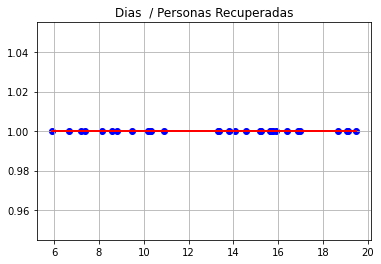

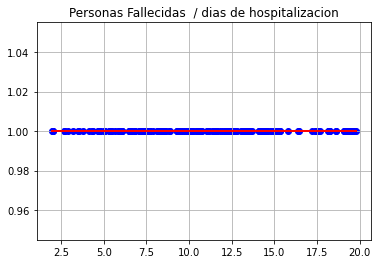

Tiempo de espera promedio = 216.67
Uso promedio de los Hospitales = 75.39 por ciento


In [77]:
import simpy
import random
import math
import matplotlib.pyplot as pp

%matplotlib inline

#PARAMETROS
HOSPITALES = 2
HGDA_CAMAS = 18
IESS_CAMAS = 6
INFECTADOS = 82
TASA_CRECIMIENTO = 30
DIAS_INTERNADO = 10
DIAS_SIMULACION = 20
CONSULTORIOS_HGDA = 1
CONSULTORIOS_IESS = 3
TIEMPO_ATENCION_MIN = 0.05
TIEMPO_ATENCION_MAX = 0.20 
T_LLEGADA_PACIENTE = 0.20

te  = 0.0 # tiempo de espera total
at  = 0.0 # atencion del pacinete total
fin = 0.0 # minuto en el que finaliza

#Diccionario para almacenar los resultados
persona_recuperadas={}
persona_fallecidas={}

class Hospital(object):
    #constructor
    def __init__(self, env, num_cama, name, consultorios):
            self.env = env
            self.num_cama = num_cama
            self.camas = simpy.Resource(env, num_cama)
            self.name = name
            self.consultorios = simpy.Resource(env, consultorios)
            
    def atencion_cliente(self, paciente):
        
        global at  #Para poder acceder a la variable dt declarada anteriormente
        R = random.random()  # Obtiene un numero aleatorio y lo guarda en R
        tiempo = TIEMPO_ATENCION_MAX - TIEMPO_ATENCION_MIN  
        tiempo_atencion = TIEMPO_ATENCION_MIN + (tiempo*R) # Distribucion uniforme
        yield env.timeout(tiempo_atencion) # deja correr el tiempo n minutos
        print("<-- Culmina atencion en  consultorio del Paciente %s en %.2f minutos" % (paciente,tiempo_atencion))
        at = at + tiempo_atencion # Acumula los tiempos de uso del consultorio
    
    
    def internar_paciente(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        print('<<< Paciente : ', paciente, 'termina internción el día: ', self.env.now, " hospital ", self.name)
    
def llegada_paciente(env, hospital, paciente, llegada):
    global te
    global fin
    with hospital.consultorios.request() as consultorios:
        yield consultorios 
        pasa = env.now
        pasar = pasa + llegada
        espera = pasar - llegada
        te = te + espera
        print('*** Paciente %s pasa al Consultorio en el minuto %.2f habiendo esperado %.2f' % (paciente, pasar, espera))
        yield env.process(hospital.atencion_cliente(paciente))
    arrive = env.now
    estado = random.randint(1,100)
    if (estado < 60):
        with hospital.camas.request() as cama:
            dias_esperando = random.randint(1,5) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
            requerimiento = yield cama | env.timeout(dias_esperando)
            wait = env.now - arrive
            if cama in requerimiento:
                print("--|-- Al paciente: ", paciente, " se le asigna una CAMA ", " en el hospital " , hospital.name)
                yield env.process(hospital.internar_paciente(paciente))
                deja = env.now
                fin = deja
                estado = random.randint(1,100)
                if (estado < 8) :
                    persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1
            else:
                print("/*\ El paciente " , paciente, " en el hospital ", hospital.name, " espero ", round(wait,2) , " dias y fallece no hay camas")
                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1        
    else :
        print("\o/ El paciente no tiene COVID : ", paciente, " hospital ", hospital.name )

def ejecutar(env, tasa_crecimiento, infectados):
    hospitalA = Hospital(env, HGDA_CAMAS, "HGDA",CONSULTORIOS_HGDA)
    hospitalB = Hospital(env, IESS_CAMAS, "IESS",CONSULTORIOS_IESS)
    for i in range(infectados):
        asignar_hospital(env, hospitalA, hospitalB, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospitalA, hospitalB, paciente)
                
def asignar_hospital(env, hospitalA, hospitalB, paciente):
   
    llegada = env.now
    R = random.random()
    llegada = -T_LLEGADA_PACIENTE * math.log(R)
    
    hosp_esc = random.randint(1,2)
    
    if (hosp_esc == 1):
        
        print('--> Día: %s llega paciente nuevo : %d al hospital HGDA en el minuto %.2f'  % (env.now, paciente,llegada))
        env.process(llegada_paciente(env, hospitalA, paciente, llegada))
    else:
        print('--> Día: %s llega paciente nuevo : %d hospital IESS en el minuto %.2f' % (env.now, paciente, llegada))
        env.process(llegada_paciente(env, hospitalB, paciente,llegada))
    
print('###############  Simulacion COVID-19  ###############')
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, INFECTADOS))
env.run(until=DIAS_SIMULACION)

print("###############  Resultados pacientes : #############")
print("Recuperados: ")
print(persona_recuperadas)
print("Fallecidos: ")
print(persona_fallecidas)

datos=sorted(persona_recuperadas.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Dias  / Personas Recuperadas")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

if (persona_fallecidas):
    datos=sorted(persona_fallecidas.items()) # Ordenamos los datos
    x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
    pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
    pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
    pp.title("Personas Fallecidas  / dias de hospitalizacion")
    pp.grid(True) #Generamos una cuadricula
    pp.show() #Mostramos el grafico

tep = te / DIAS_SIMULACION
print ("Tiempo de espera promedio = %.2f" % tep)

upc = (at / fin) / (CONSULTORIOS_HGDA +  CONSULTORIOS_IESS)
print ("Uso promedio de los Hospitales = %.2f por ciento" % (upc*100))

## Referencias
[1] Matloff, N. (2008). Introduction to Discrete-Event Simulation and the SimPy Language.

[2] Team Simpy (2017). SimPy Documentation, Release 3.0.10, 2017. URL: https://media.readthedocs.org/pdf/simpy/latest/simpy.pdf 